**COMBINED CYCLE POWER PLANT**

This program is a regression problem based on the article ["Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods"](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908) (Pınar Tüfekci, 2014). The dataset was obtained from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

**Problem Description**

The combined cycle power plant (CCPP) is an energy generator  composed by two gas turbines, one steam turbine and two heat recovery systems. The prediction of energy output for CCPP is a big challenge due to the nature of the problem, which requires a set of thermodynamics equations and these equation must be numerically solved, process that takes much time and a great computational cost. The main objective in this work is to obtain a new method to predict the energy output without considering the thermodynamics equations.

**CCPP Description**

For all details [see](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908).

**Dataset Description**

The dataset is composed by five columns and 9568 rows.  In this problem the target variable is called PE (Full Load Electrical Power Output) which is the addition of energy provided by three turbines. The CCPP is very sensible to the external conditions, then we consider the independent variables as ambient temperature (AT), atmospheric pressure (AP), relativity humidity (RH) and exhaust steam pressure (or vacuum, V).  All input variables correspond to average hourly data in a period of six years.

The units and the range of each variable is presented below:

+ AT: 1.81 - 37.11 ºC (Celsius)

+ AP 992.89 - 1033.30 mbar

+ RH 25.56% - 100.16%

+ V 25.36 - 81.56 cm Hg

+ PE 420.26 - 495.76 MW

**Objective**

The main objective of this problem is to reproduce the same measures made by [Pınar Tüfekci](https://www.sciencedirect.com/science/article/abs/pii/S0142061514000908) and compare the results. In the original work the author considers a range of subset, it means, he considers subsets with one independent variables, two, three and full model, this is an exhaustive method to choose the best independent variables configuration to train the model. In this way we have $(2^n - 1)$ possibles combinations of independent variables vs target variable, totaling 15 models to be trained. 

The subsets are organized as:

+ One independent variable (4 models)
+ Two independent variables (6 models)
+ Three independent variables (4 models)
+ Full model (1 model)

Beyond the exhaustive analysis, in this work I’ll also consider  PCA (principal components analysis) to train a set of four models and comparate with the results from exhaustive analysis.


**Metrics and comparisons**

In the original work the author works with WEKA toolbox to build 15 regression models and  utilizes as metrics: Mean Absolute Error (MAE) and Root Mean-Squared Error (RMSE).  Here I consider four regression models from Scikit-Learn, in addition I also consider the $R^2$ score.

The comparisons will be made based on the best scores of each subset found in the original work, considering the same number of cross validation.

**Program organization**

+ Exploratory Data Analysis (EDA)
+ Building the models with exhaustive analysis
+ Building the models with PCA
+ Results
+ Conclusion

# Exploratory Data Analysis

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Combined_Cycle_Power_Plant.csv')

In [3]:
dataset.shape

(9568, 5)

In [4]:
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
dataset.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Histogram of numerical variable

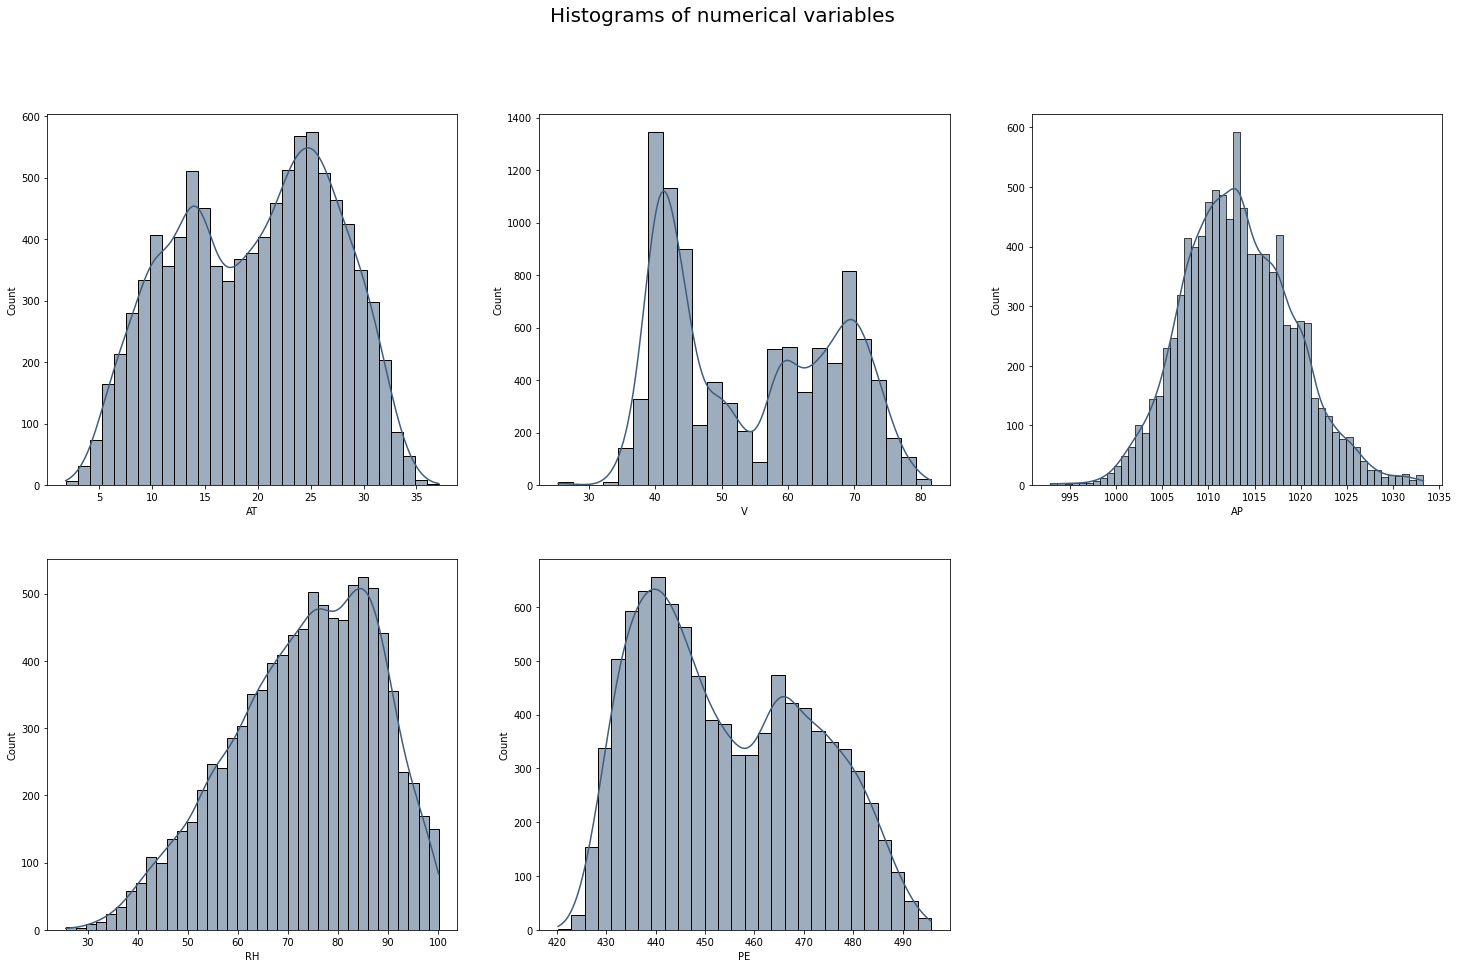

In [7]:
plt.figure(figsize=(25,15))
plt.suptitle('Histograms of numerical variables', fontsize = 20)
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(2, 3, i)
    f = plt.gca()
    sns.histplot(dataset.iloc[:, i-1], color = '#3F5D7D', kde= True)

## Pair Plot of numerical variables

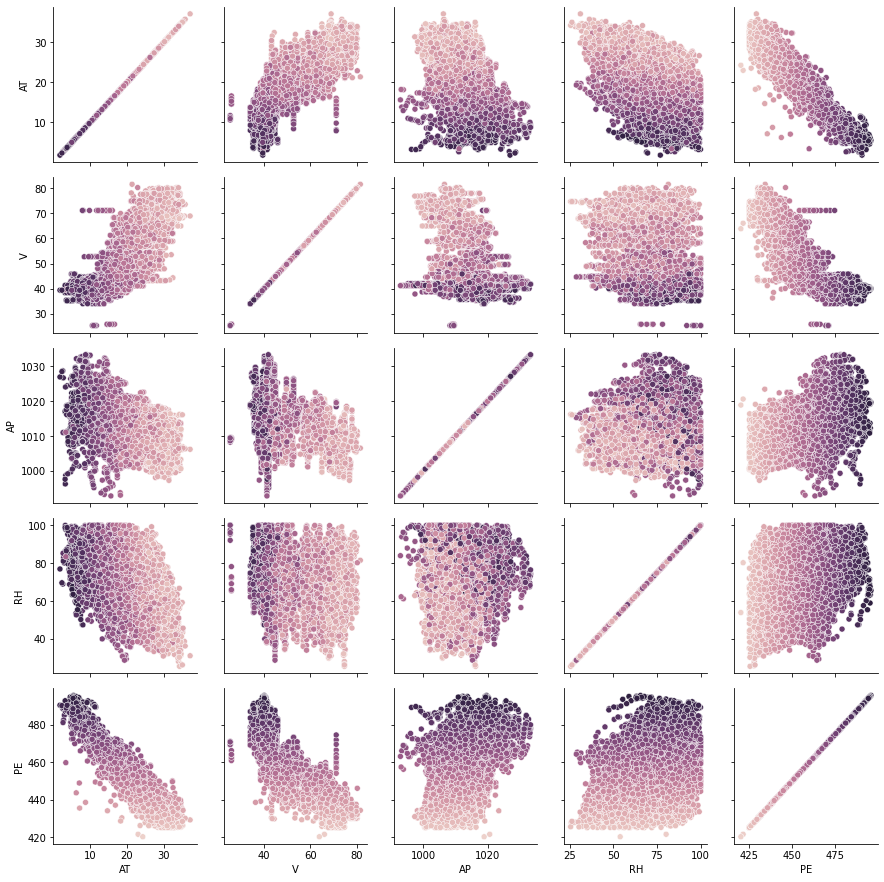

In [8]:
g = sns.PairGrid(data=dataset, vars=['AT', 'V', 'AP', 'RH','PE'], hue='PE')
g.map(sns.scatterplot,  color = '#3F5D7D')

## Scatter plot between the target variable and features

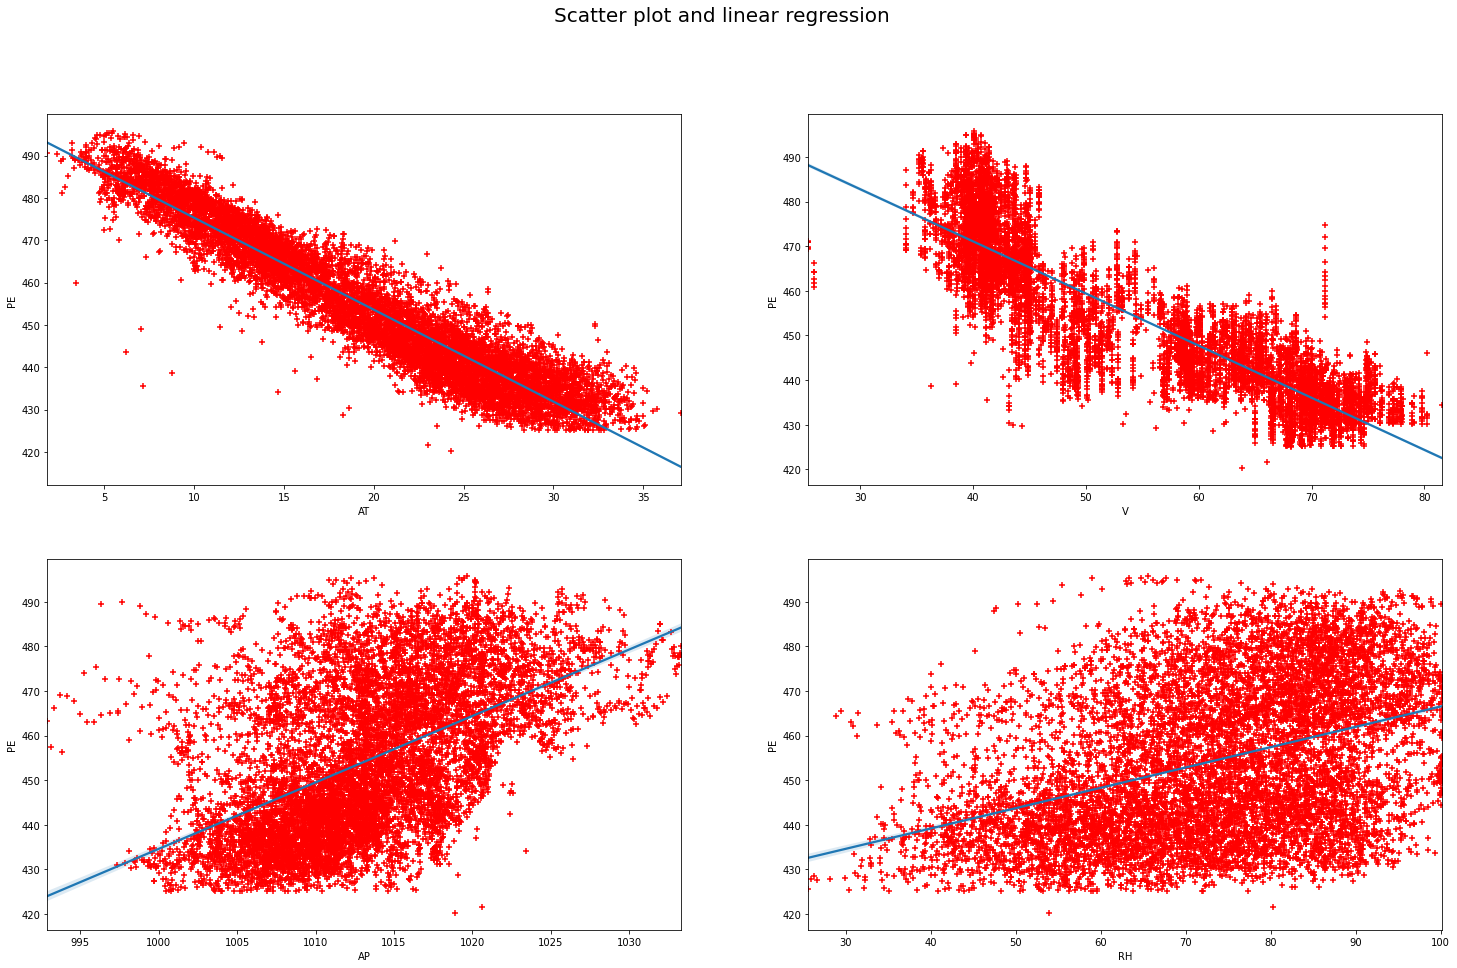

In [9]:
plt.figure(figsize=(25,15))
plt.suptitle('Scatter plot and linear regression', fontsize = 20)
for i in range(1, dataset.shape[1]):
    plt.subplot(2, 2, i)
    #f = plt.gca()
    sns.regplot(data=dataset, x=dataset.iloc[:, i-1], y=dataset['PE'], scatter=False, fit_reg=True)
    plt.scatter(dataset.iloc[:, i-1], dataset['PE'], color = 'r', marker='+' )
plt.show()

## Correlation with the response

<AxesSubplot:title={'center':'Correlation with reponse variable'}>

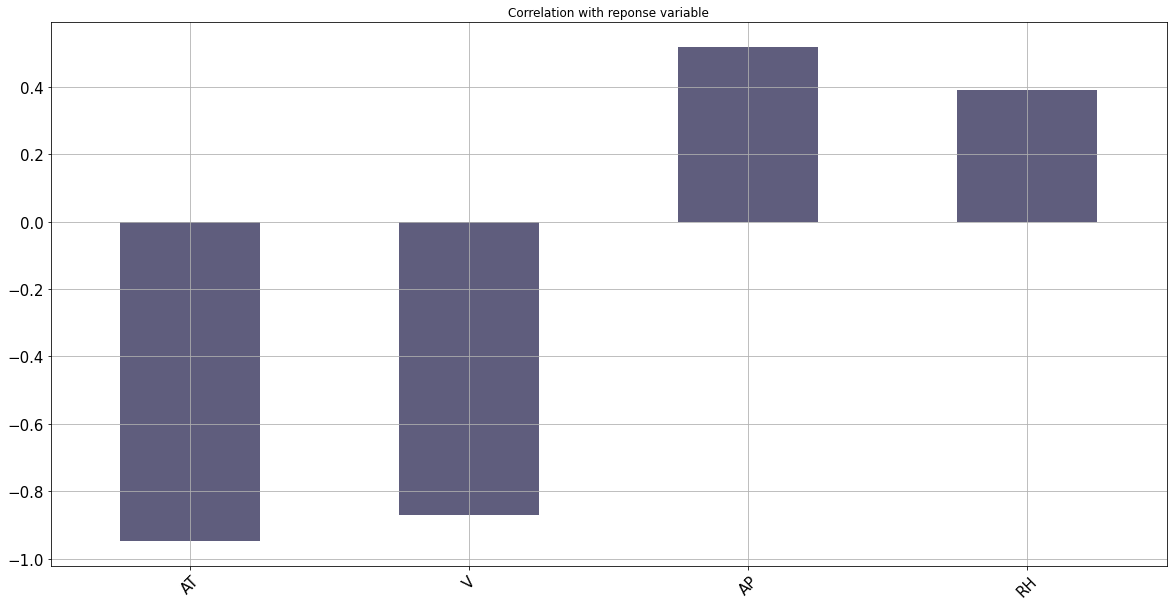

In [10]:
dataset.drop(columns='PE').corrwith(dataset.PE).plot.bar(figsize = (20,10),
                                            title = 'Correlation with reponse variable',
                                            fontsize = 15, rot = 45, grid = True, color = '#5F5D7D')

## Matrix correlation between all variables

<AxesSubplot:>

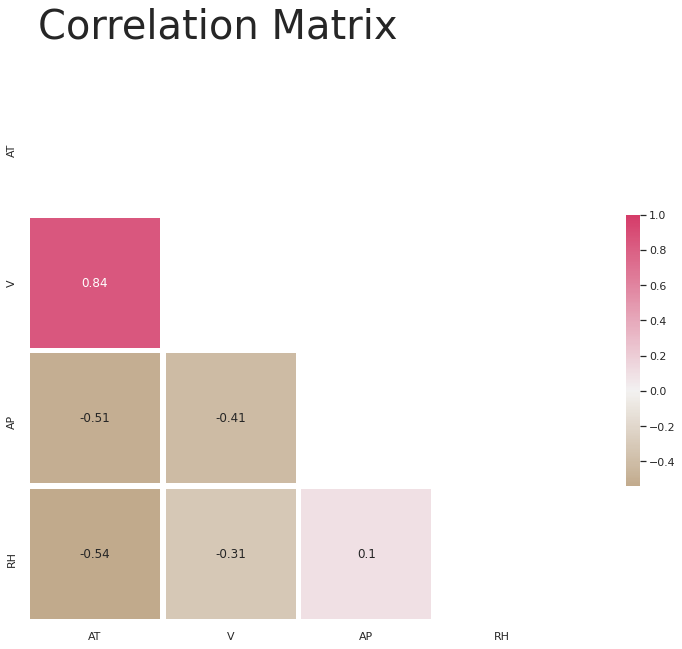

In [11]:
sns.set(style='white', font_scale= 1)
corr = dataset.drop(columns='PE').corr() # here we compute the correlation between numericals variables
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype= np.bool) # To generate a numpy array from correlation with true or false
mask[np.triu_indices_from(mask)] = True # To have the index of the upper triangle
# Setup the matplotlib figures
f, ax = plt.subplots(figsize = (20,10))
f.suptitle('Correlation Matrix', fontsize=40)
# Generate a custum diverging color map
cmap = sns.diverging_palette(50, 0, as_cmap=True)
# Draw the heatmap with the mask and the correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=5, cbar_kws={'shrink': .5})

# Building the model (Exhaustive analysis)

## Subsets with one independent variable

### AT vs PE

In [12]:
X_11 = dataset.iloc[:, 0].values
y_11 = dataset.iloc[:, -1].values
X_11 = X_11.reshape(len(X_11), 1)

#### Splitting the dataset into training and test set

In [13]:
from sklearn.model_selection import train_test_split
X_11_train, X_11_test, y_11_train, y_11_test = train_test_split(X_11, y_11,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [14]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X11_LR = LinearRegression()
regressor_X11_LR.fit(X_11_train, y_11_train)

# Polynomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X11_poly_reg = PolynomialFeatures(degree = 6)
X11_poly = X11_poly_reg.fit_transform(X_11_train)
regressor_X11_PR = LinearRegression()
regressor_X11_PR.fit(X11_poly, y_11_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X11_DT = DecisionTreeRegressor(random_state = 0)
regressor_X11_DT.fit(X_11_train, y_11_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X11_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X11_RF.fit(X_11_train, y_11_train)

# Support Vector Machine
y_11_train = y_11_train.reshape(len(y_11_train), 1)
y_11_test = y_11_test.reshape(len(y_11_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X11 = StandardScaler()
sc_y11 = StandardScaler()
X_11_train_s = sc_X11.fit_transform(X_11_train)
y_11_train_s = sc_y11.fit_transform(y_11_train)

from sklearn.svm import SVR
regressor_X11_SV = SVR(kernel = 'rbf')
y_11_train_s = np.ravel(y_11_train_s)
regressor_X11_SV.fit(X_11_train_s, y_11_train_s)

SVR()

#### Predicting new results

In [15]:
y_pred_11_LR = regressor_X11_LR.predict(X_11_test) # Linear Regression
y_pred_11_DT = regressor_X11_DT.predict(X_11_test) # Decision Tree
y_pred_11_RF = regressor_X11_RF.predict(X_11_test) # Random Forest
y_pred_11_SV = sc_y11.inverse_transform(regressor_X11_SV.predict(sc_X11.transform(X_11_test))) # Support Vector Machine

#### Metrics scores

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_11_LR = r2_score(y_11_test, y_pred_11_LR)
print('R2 score: {}'.format(r2_11_LR))
mae_11_LR = mean_absolute_error(y_11_test, y_pred_11_LR)
print('MAE score: {}'.format(mae_11_LR))
rmse_11_LR = np.sqrt(mean_squared_error(y_11_test, y_pred_11_LR))
print('RMSE score: {}'.format(rmse_11_LR))
print('\n')

print('Decision Tree')
r2_11_DT = r2_score(y_11_test, y_pred_11_DT)
print('R2 score: {}'.format(r2_11_DT))
mae_11_DT = mean_absolute_error(y_11_test, y_pred_11_DT)
print('MAE score: {}'.format(mae_11_DT))
rmse_11_DT = np.sqrt(mean_squared_error(y_11_test, y_pred_11_DT))
print('RMSE score: {}'.format(rmse_11_DT))
print('\n')

print('Random Forest')
r2_11_RF = r2_score(y_11_test, y_pred_11_RF)
print('R2 score: {}'.format(r2_11_RF))
mae_11_RF = mean_absolute_error(y_11_test, y_pred_11_RF)
print('MAE score: {}'.format(mae_11_RF))
rmse_11_RF = np.sqrt(mean_squared_error(y_11_test, y_pred_11_RF))
print('RMSE score: {}'.format(rmse_11_RF))
print('\n')

print('Support Vector Machine')
r2_11_SV = r2_score(y_11_test, y_pred_11_SV)
print('R2 score: {}'.format(r2_11_SV))
mae_11_SV = mean_absolute_error(y_11_test, y_pred_11_SV)
print('MAE score: {}'.format(mae_11_SV))
rmse_11_SV = np.sqrt(mean_squared_error(y_11_test, y_pred_11_SV))
print('RMSE score: {}'.format(rmse_11_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9049536175690113
MAE score: 4.174438156494202
RMSE score: 5.272562059337883


Decision Tree
R2 score: 0.8795086758953446
MAE score: 4.633473127113801
RMSE score: 5.93651805220736


Random Forest
R2 score: 0.8862465543082302
MAE score: 4.495212547182292
RMSE score: 5.76814520546431


Support Vector Machine
R2 score: 0.9156926732648751
MAE score: 3.895441620391207
RMSE score: 4.9657695792038945




#### Cross Validation

In [17]:
#from sklearn.metrics import SCORERS as SC # If you want to know all the metrics
#SC.keys()

from sklearn.model_selection import cross_val_score

y_11_train = np.ravel(y_11_train)

r211_LR = cross_val_score(estimator=regressor_X11_LR, X = X_11_train, y=y_11_train, cv = 10, scoring='r2')
r211_DT = cross_val_score(estimator=regressor_X11_DT, X = X_11_train, y=y_11_train, cv = 10, scoring='r2')
r211_RF = cross_val_score(estimator=regressor_X11_RF, X = X_11_train, y=y_11_train, cv = 10, scoring='r2')
r211_SV = cross_val_score(estimator=regressor_X11_SV, X = X_11_train_s, y=y_11_train_s, cv = 10, scoring='r2')


print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r211_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r211_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r211_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r211_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r211_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r211_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r211_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r211_SV.std()*2*100))


Checking Cross Validation


Linear Regression
R^2 score: 89.70 %
Standard Deviation (+/-): 1.26 %


Decision Tree
R^2 score: 86.70 %
Standard Deviation (+/-): 1.59 %


Random Forest
R^2 score: 87.99 %
Standard Deviation (+/-): 1.55 %


Support Vector Machine
R^2 score: 91.00 %
Standard Deviation (+/-): 1.38 %


### V vs PE

In [18]:
X_12 = dataset['V'].values
y_12 = dataset['PE'].values
X_12 = X_12.reshape(len(X_12), 1)

#### Splitting the dataset into training and test set

In [19]:
from sklearn.model_selection import train_test_split
X_12_train, X_12_test, y_12_train, y_12_test = train_test_split(X_12, y_12,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [20]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X12_LR = LinearRegression()
regressor_X12_LR.fit(X_12_train, y_12_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X12_DT = DecisionTreeRegressor(random_state = 0)
regressor_X12_DT.fit(X_12_train, y_12_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X12_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X12_RF.fit(X_12_train, y_12_train)

# Support Vector Machine
y_12_train = y_12_train.reshape(len(y_12_train), 1)
y_12_test = y_12_test.reshape(len(y_12_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X12 = StandardScaler()
sc_y12 = StandardScaler()
X_12_train_s = sc_X12.fit_transform(X_12_train)
y_12_train_s = sc_y12.fit_transform(y_12_train)

from sklearn.svm import SVR
regressor_X12_SV = SVR(kernel = 'rbf')
y_12_train_s = np.ravel(y_12_train_s)
regressor_X12_SV.fit(X_12_train_s, y_12_train_s)

SVR()

#### Predicting new results

In [21]:
y_pred_12_LR = regressor_X12_LR.predict(X_12_test) # Linear Regression
y_pred_12_DT = regressor_X12_DT.predict(X_12_test) # Decision Tree
y_pred_12_RF = regressor_X12_RF.predict(X_12_test) # Random Forest
y_pred_12_SV = sc_y12.inverse_transform(regressor_X12_SV.predict(sc_X12.transform(X_12_test))) # Support Vector Machine

#### Metrics scores

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_12_LR = r2_score(y_12_test, y_pred_12_LR)
print('R2 score: {}'.format(r2_12_LR))
mae_12_LR = mean_absolute_error(y_12_test, y_pred_12_LR)
print('MAE score: {}'.format(mae_12_LR))
rmse_12_LR = np.sqrt(mean_squared_error(y_12_test, y_pred_12_LR))
print('RMSE score: {}'.format(rmse_12_LR))
print('\n')

print('Decision Tree')
r2_12_DT = r2_score(y_12_test, y_pred_12_DT)
print('R2 score: {}'.format(r2_12_DT))
mae_12_DT = mean_absolute_error(y_12_test, y_pred_12_DT)
print('MAE score: {}'.format(mae_12_DT))
rmse_12_DT = np.sqrt(mean_squared_error(y_12_test, y_pred_12_DT))
print('RMSE score: {}'.format(rmse_12_DT))
print('\n')

print('Random Forest')
r2_12_RF = r2_score(y_12_test, y_pred_12_RF)
print('R2 score: {}'.format(r2_12_RF))
mae_12_RF = mean_absolute_error(y_12_test, y_pred_12_RF)
print('MAE score: {}'.format(mae_12_RF))
rmse_12_RF = np.sqrt(mean_squared_error(y_12_test, y_pred_12_RF))
print('RMSE score: {}'.format(rmse_12_RF))
print('\n')

print('Support Vector Machine')
r2_12_SV = r2_score(y_12_test, y_pred_12_SV)
print('R2 score: {}'.format(r2_12_SV))
mae_12_SV = mean_absolute_error(y_12_test, y_pred_12_SV)
print('MAE score: {}'.format(mae_12_SV))
rmse_12_SV = np.sqrt(mean_squared_error(y_12_test, y_pred_12_SV))
print('RMSE score: {}'.format(rmse_12_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.7558220412509646
MAE score: 6.571483075051841
RMSE score: 8.450981163858412


Decision Tree
R2 score: 0.9099826439819951
MAE score: 3.834960431303587
RMSE score: 5.1311774106292125


Random Forest
R2 score: 0.9084637404768998
MAE score: 3.880263046938069
RMSE score: 5.174286657877951


Support Vector Machine
R2 score: 0.798696637093838
MAE score: 5.966836580459061
RMSE score: 7.673251259783508




#### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

y_12_train = np.ravel(y_12_train)

r212_LR = cross_val_score(estimator=regressor_X12_LR, X = X_12_train, y=y_12_train, cv = 10, scoring='r2')
r212_DT = cross_val_score(estimator=regressor_X12_DT, X = X_12_train, y=y_12_train, cv = 10, scoring='r2')
r212_RF = cross_val_score(estimator=regressor_X12_RF, X = X_12_train, y=y_12_train, cv = 10, scoring='r2')
r212_SV = cross_val_score(estimator=regressor_X12_SV, X = X_12_train_s, y=y_12_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r212_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r212_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r212_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r212_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 75.62 %
Standard Deviation (+/-): 2.32 %


Decision Tree
R^2 score: 90.82 %
Standard Deviation (+/-): 1.68 %


Random Forest
R^2 score: 90.68 %
Standard Deviation (+/-): 1.67 %


Support Vector Machine
R^2 score: 79.30 %
Standard Deviation (+/-): 2.58 %


### AP vs PE

In [24]:
X_13 = dataset['AP'].values
y_13 = dataset['PE'].values
X_13 = X_13.reshape(len(X_13), 1)

#### Splitting the dataset into training and test set

In [25]:
from sklearn.model_selection import train_test_split
X_13_train, X_13_test, y_13_train, y_13_test = train_test_split(X_13, y_13,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [26]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X13_LR = LinearRegression()
regressor_X13_LR.fit(X_13_train, y_13_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X13_DT = DecisionTreeRegressor(random_state = 0)
regressor_X13_DT.fit(X_13_train, y_13_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X13_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X13_RF.fit(X_13_train, y_13_train)

# Support Vector Machine
y_13_train = y_13_train.reshape(len(y_13_train), 1)
y_13_test = y_13_test.reshape(len(y_13_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X13 = StandardScaler()
sc_y13 = StandardScaler()
X_13_train_s = sc_X13.fit_transform(X_13_train)
y_13_train_s = sc_y13.fit_transform(y_13_train)

from sklearn.svm import SVR
regressor_X13_SV = SVR(kernel = 'rbf')
y_13_train_s = np.ravel(y_13_train_s)
regressor_X13_SV.fit(X_13_train_s, y_13_train_s)

SVR()

#### Predicting new results

In [27]:
y_pred_13_LR = regressor_X13_LR.predict(X_13_test) # Linear Regression
y_pred_13_DT = regressor_X13_DT.predict(X_13_test) # Decision Tree
y_pred_13_RF = regressor_X13_RF.predict(X_13_test) # Random Forest
y_pred_13_SV = sc_y13.inverse_transform(regressor_X13_SV.predict(sc_X13.transform(X_13_test))) # Support Vector Machine

#### Metrics scores

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_13_LR = r2_score(y_13_test, y_pred_13_LR)
print('R2 score: {}'.format(r2_13_LR))
mae_13_LR = mean_absolute_error(y_13_test, y_pred_13_LR)
print('MAE score: {}'.format(mae_13_LR))
rmse_13_LR = np.sqrt(mean_squared_error(y_13_test, y_pred_13_LR))
print('RMSE score: {}'.format(rmse_13_LR))
print('\n')

print('Decision Tree')
r2_13_DT = r2_score(y_13_test, y_pred_13_DT)
print('R2 score: {}'.format(r2_13_DT))
mae_13_DT = mean_absolute_error(y_13_test, y_pred_13_DT)
print('MAE score: {}'.format(mae_13_DT))
rmse_13_DT = np.sqrt(mean_squared_error(y_13_test, y_pred_13_DT))
print('RMSE score: {}'.format(rmse_13_DT))
print('\n')

print('Random Forest')
r2_13_RF = r2_score(y_13_test, y_pred_13_RF)
print('R2 score: {}'.format(r2_13_RF))
mae_13_RF = mean_absolute_error(y_13_test, y_pred_13_RF)
print('MAE score: {}'.format(mae_13_RF))
rmse_13_RF = np.sqrt(mean_squared_error(y_13_test, y_pred_13_RF))
print('RMSE score: {}'.format(rmse_13_RF))
print('\n')

print('Support Vector Machine')
r2_13_SV = r2_score(y_13_test, y_pred_13_SV)
print('R2 score: {}'.format(r2_13_SV))
mae_13_SV = mean_absolute_error(y_13_test, y_pred_13_SV)
print('MAE score: {}'.format(mae_13_SV))
rmse_13_SV = np.sqrt(mean_squared_error(y_13_test, y_pred_13_SV))
print('RMSE score: {}'.format(rmse_13_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.26232846285025535
MAE score: 12.05211681932955
RMSE score: 14.688769560879729


Decision Tree
R2 score: 0.03723231149205275
MAE score: 13.171592197915864
RMSE score: 16.780877131523813


Random Forest
R2 score: 0.09066635359666375
MAE score: 12.865718533161989
RMSE score: 16.308556955965763


Support Vector Machine
R2 score: 0.260636024438769
MAE score: 11.32943015684852
RMSE score: 14.705610115201734




#### Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

y_13_train = np.ravel(y_13_train)

r213_LR = cross_val_score(estimator=regressor_X13_LR, X = X_13_train, y=y_13_train, cv = 10, scoring='r2')
r213_DT = cross_val_score(estimator=regressor_X13_DT, X = X_13_train, y=y_13_train, cv = 10, scoring='r2')
r213_RF = cross_val_score(estimator=regressor_X13_RF, X = X_13_train, y=y_13_train, cv = 10, scoring='r2')
r213_SV = cross_val_score(estimator=regressor_X13_SV, X = X_13_train_s, y=y_13_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r213_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r213_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r213_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r213_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r213_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r213_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r213_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r213_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 26.93 %
Standard Deviation (+/-): 4.31 %


Decision Tree
R^2 score: 3.68 %
Standard Deviation (+/-): 11.19 %


Random Forest
R^2 score: 9.12 %
Standard Deviation (+/-): 9.60 %


Support Vector Machine
R^2 score: 26.27 %
Standard Deviation (+/-): 4.93 %


### RH vs PE

In [30]:
X_14 = dataset['RH'].values
y_14 = dataset['PE'].values
X_14 = X_14.reshape(len(X_14), 1) 

#### Splitting the dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split
X_14_train, X_14_test, y_14_train, y_14_test = train_test_split(X_14, y_14,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [32]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X14_LR = LinearRegression()
regressor_X14_LR.fit(X_14_train, y_14_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X14_DT = DecisionTreeRegressor(random_state = 0)
regressor_X14_DT.fit(X_14_train, y_14_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X14_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X14_RF.fit(X_14_train, y_14_train)

# Support Vector Machine
y_14_train = y_14_train.reshape(len(y_14_train), 1)
y_14_test = y_14_test.reshape(len(y_14_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X14 = StandardScaler()
sc_y14 = StandardScaler()
X_14_train_s = sc_X14.fit_transform(X_14_train)
#X_11_test_s = sc_X11.fit(X_11_test)
y_14_train_s = sc_y14.fit_transform(y_14_train)
#y_11_test_s = sc_X11.fit(y_11_test)

from sklearn.svm import SVR
regressor_X14_SV = SVR(kernel = 'rbf')
y_14_train_s = np.ravel(y_14_train_s)
regressor_X14_SV.fit(X_14_train_s, y_14_train_s)

SVR()

#### Predicting new results

In [33]:
y_pred_14_LR = regressor_X14_LR.predict(X_14_test) # Linear Regression
y_pred_14_DT = regressor_X14_DT.predict(X_14_test) # Decision Tree
y_pred_14_RF = regressor_X14_RF.predict(X_14_test) # Random Forest
y_pred_14_SV = sc_y14.inverse_transform(regressor_X14_SV.predict(sc_X14.transform(X_14_test))) # Support Vector Machine

#### Metrics scores

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_14_LR = r2_score(y_14_test, y_pred_14_LR)
print('R2 score: {}'.format(r2_14_LR))
mae_14_LR = mean_absolute_error(y_14_test, y_pred_14_LR)
print('MAE score: {}'.format(mae_14_LR))
rmse_14_LR = np.sqrt(mean_squared_error(y_14_test, y_pred_14_LR))
print('RMSE score: {}'.format(rmse_14_LR))
print('\n')

print('Decision Tree')
r2_14_DT = r2_score(y_14_test, y_pred_14_DT)
print('R2 score: {}'.format(r2_14_DT))
mae_14_DT = mean_absolute_error(y_14_test, y_pred_14_DT)
print('MAE score: {}'.format(mae_14_DT))
rmse_14_DT = np.sqrt(mean_squared_error(y_14_test, y_pred_14_DT))
print('RMSE score: {}'.format(rmse_14_DT))
print('\n')

print('Random Forest')
r2_14_RF = r2_score(y_14_test, y_pred_14_RF)
print('R2 score: {}'.format(r2_14_RF))
mae_14_RF = mean_absolute_error(y_14_test, y_pred_14_RF)
print('MAE score: {}'.format(mae_14_RF))
rmse_14_RF = np.sqrt(mean_squared_error(y_14_test, y_pred_14_RF))
print('RMSE score: {}'.format(rmse_14_RF))
print('\n')

print('Support Vector Machine')
r2_14_SV = r2_score(y_14_test, y_pred_14_SV)
print('R2 score: {}'.format(r2_14_SV))
mae_14_SV = mean_absolute_error(y_14_test, y_pred_14_SV)
print('MAE score: {}'.format(mae_14_SV))
rmse_14_SV = np.sqrt(mean_squared_error(y_14_test, y_pred_14_SV))
print('RMSE score: {}'.format(rmse_14_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.15762597784830434
MAE score: 13.197694425300151
RMSE score: 15.696628759786787


Decision Tree
R2 score: -0.3892890687194821
MAE score: 16.059099666372994
RMSE score: 20.15812869779458


Random Forest
R2 score: -0.193566109545402
MAE score: 15.021794621799827
RMSE score: 18.684313418210106


Support Vector Machine
R2 score: 0.1467779488942439
MAE score: 12.887743114581912
RMSE score: 15.797375444383341




#### Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

y_14_train = np.ravel(y_14_train)

r214_LR = cross_val_score(estimator=regressor_X14_LR, X = X_14_train, y=y_14_train, cv = 10, scoring='r2')
r214_DT = cross_val_score(estimator=regressor_X14_DT, X = X_14_train, y=y_14_train, cv = 10, scoring='r2')
r214_RF = cross_val_score(estimator=regressor_X14_RF, X = X_14_train, y=y_14_train, cv = 10, scoring='r2')
r214_SV = cross_val_score(estimator=regressor_X14_SV, X = X_14_train_s, y=y_14_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r214_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r214_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r214_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r214_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r214_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r214_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r214_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r214_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 14.91 %
Standard Deviation (+/-): 3.33 %


Decision Tree
R^2 score: -40.95 %
Standard Deviation (+/-): 8.40 %


Random Forest
R^2 score: -19.80 %
Standard Deviation (+/-): 6.76 %


Support Vector Machine
R^2 score: 13.10 %
Standard Deviation (+/-): 5.05 %


## Subsets with two independent variables

### AP-V vs PE

In [36]:
X_21 = dataset.iloc[:, 1:3].values
y_21 = dataset['PE'].values

#### Splitting the dataset into training and test set


In [37]:
from sklearn.model_selection import train_test_split
X_21_train, X_21_test, y_21_train, y_21_test = train_test_split(X_21, y_21,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [38]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X21_LR = LinearRegression()
regressor_X21_LR.fit(X_21_train, y_21_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X21_DT = DecisionTreeRegressor(random_state = 0)
regressor_X21_DT.fit(X_21_train, y_21_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X21_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X21_RF.fit(X_21_train, y_21_train)

# Support Vector Machine

y_21_train = y_21_train.reshape(len(y_11_train), 1)
y_21_test = y_21_test.reshape(len(y_21_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X21 = StandardScaler()
sc_y21 = StandardScaler()
X_21_train_s = sc_X21.fit_transform(X_21_train)
y_21_train_s = sc_y21.fit_transform(y_21_train)

from sklearn.svm import SVR
regressor_X21_SV = SVR(kernel = 'rbf')
y_21_train_s = np.ravel(y_21_train_s)
regressor_X21_SV.fit(X_21_train_s, y_21_train_s)

SVR()

#### Predicting new results

In [39]:
y_pred_21_LR = regressor_X21_LR.predict(X_21_test) # Linear Regression
y_pred_21_DT = regressor_X21_DT.predict(X_21_test) # Decision Tree
y_pred_21_RF = regressor_X21_RF.predict(X_21_test) # Random Forest
y_pred_21_SV = sc_y21.inverse_transform(regressor_X21_SV.predict(sc_X21.transform(X_21_test))) # Support Vector Machine

#### Metrics Scores

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_21_LR = r2_score(y_21_test, y_pred_21_LR)
print('R2 score: {}'.format(r2_21_LR))
mae_21_LR = mean_absolute_error(y_21_test, y_pred_21_LR)
print('MAE score: {}'.format(mae_21_LR))
rmse_21_LR = np.sqrt(mean_squared_error(y_21_test, y_pred_21_LR))
print('RMSE score: {}'.format(rmse_21_LR))
print('\n')

print('Decision Tree')
r2_21_DT = r2_score(y_21_test, y_pred_21_DT)
print('R2 score: {}'.format(r2_21_DT))
mae_21_DT = mean_absolute_error(y_21_test, y_pred_21_DT)
print('MAE score: {}'.format(mae_21_DT))
rmse_21_DT = np.sqrt(mean_squared_error(y_21_test, y_pred_21_DT))
print('RMSE score: {}'.format(rmse_21_DT))
print('\n')

print('Random Forest')
r2_21_RF = r2_score(y_21_test, y_pred_21_RF)
print('R2 score: {}'.format(r2_21_RF))
mae_21_RF = mean_absolute_error(y_21_test, y_pred_21_RF)
print('MAE score: {}'.format(mae_21_RF))
rmse_21_RF = np.sqrt(mean_squared_error(y_21_test, y_pred_21_RF))
print('RMSE score: {}'.format(rmse_21_RF))
print('\n')

print('Support Vector Machine')
r2_21_SV = r2_score(y_21_test, y_pred_21_SV)
print('R2 score: {}'.format(r2_21_SV))
mae_21_SV = mean_absolute_error(y_21_test, y_pred_21_SV)
print('MAE score: {}'.format(mae_21_SV))
rmse_21_SV = np.sqrt(mean_squared_error(y_21_test, y_pred_21_SV))
print('RMSE score: {}'.format(rmse_21_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.7862427521506203
MAE score: 6.139893225549995
RMSE score: 7.907047157214021


Decision Tree
R2 score: 0.8780054323316999
MAE score: 3.7212543663233326
RMSE score: 5.9734351122571985


Random Forest
R2 score: 0.9224567788049027
MAE score: 3.261590448201224
RMSE score: 4.762399492402401


Support Vector Machine
R2 score: 0.8282208883926423
MAE score: 5.421112749138458
RMSE score: 7.088250880051735




#### Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

y_21_train = np.ravel(y_21_train)

r212_LR = cross_val_score(estimator=regressor_X21_LR, X = X_21_train, y=y_21_train, cv = 10, scoring='r2')
r212_DT = cross_val_score(estimator=regressor_X21_DT, X = X_21_train, y=y_21_train, cv = 10, scoring='r2')
r212_RF = cross_val_score(estimator=regressor_X21_RF, X = X_21_train, y=y_21_train, cv = 10, scoring='r2')
r212_SV = cross_val_score(estimator=regressor_X21_SV, X = X_21_train_s, y=y_21_train_s, cv = 10, scoring='r2')

r212_SV

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r212_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r212_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r212_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r212_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r212_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 78.67 %
Standard Deviation (+/-): 1.72 %


Decision Tree
R^2 score: 89.22 %
Standard Deviation (+/-): 2.18 %


Random Forest
R^2 score: 92.25 %
Standard Deviation (+/-): 1.10 %


Support Vector Machine
R^2 score: 82.61 %
Standard Deviation (+/-): 1.84 %


### AT-AP vs PE

In [42]:
X_22 = dataset.iloc[:, 0:3:2].values
y_22 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [43]:
from sklearn.model_selection import train_test_split
X_22_train, X_22_test, y_22_train, y_22_test = train_test_split(X_22, y_22,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [44]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X22_LR = LinearRegression()
regressor_X22_LR.fit(X_22_train, y_22_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X22_DT = DecisionTreeRegressor(random_state = 0)
regressor_X22_DT.fit(X_22_train, y_22_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X22_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X22_RF.fit(X_22_train, y_22_train)

# Support Vector Machine

y_22_train = y_22_train.reshape(len(y_22_train), 1)
y_22_test = y_22_test.reshape(len(y_22_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X22 = StandardScaler()
sc_y22 = StandardScaler()
X_22_train_s = sc_X22.fit_transform(X_22_train)
y_22_train_s = sc_y22.fit_transform(y_22_train)

from sklearn.svm import SVR
regressor_X22_SV = SVR(kernel = 'rbf')
y_22_train_s = np.ravel(y_22_train_s)
regressor_X22_SV.fit(X_22_train_s, y_22_train_s)

SVR()

#### Predicting new results

In [45]:
y_pred_22_LR = regressor_X22_LR.predict(X_22_test) # Linear Regression
y_pred_22_DT = regressor_X22_DT.predict(X_22_test) # Decision Tree
y_pred_22_RF = regressor_X22_RF.predict(X_22_test) # Random Forest
y_pred_22_SV = sc_y22.inverse_transform(regressor_X22_SV.predict(sc_X22.transform(X_22_test))) # Support Vector Machine

#### Metrics Scores

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_22_LR = r2_score(y_22_test, y_pred_22_LR)
print('R2 score: {}'.format(r2_22_LR))
mae_22_LR = mean_absolute_error(y_22_test, y_pred_22_LR)
print('MAE score: {}'.format(mae_22_LR))
rmse_22_LR = np.sqrt(mean_squared_error(y_22_test, y_pred_22_LR))
print('RMSE score: {}'.format(rmse_22_LR))
print('\n')

print('Decision Tree')
r2_22_DT = r2_score(y_22_test, y_pred_22_DT)
print('R2 score: {}'.format(r2_22_DT))
mae_22_DT = mean_absolute_error(y_22_test, y_pred_22_DT)
print('MAE score: {}'.format(mae_22_DT))
rmse_22_DT = np.sqrt(mean_squared_error(y_22_test, y_pred_22_DT))
print('RMSE score: {}'.format(rmse_22_DT))
print('\n')

print('Random Forest')
r2_22_RF = r2_score(y_22_test, y_pred_22_RF)
print('R2 score: {}'.format(r2_22_RF))
mae_22_RF = mean_absolute_error(y_22_test, y_pred_22_RF)
print('MAE score: {}'.format(mae_22_RF))
rmse_22_RF = np.sqrt(mean_squared_error(y_22_test, y_pred_22_RF))
print('RMSE score: {}'.format(rmse_22_RF))
print('\n')

print('Support Vector Machine')
r2_22_SV = r2_score(y_22_test, y_pred_22_SV)
print('R2 score: {}'.format(r2_22_SV))
mae_22_SV = mean_absolute_error(y_22_test, y_pred_22_SV)
print('MAE score: {}'.format(mae_22_SV))
rmse_22_SV = np.sqrt(mean_squared_error(y_22_test, y_pred_22_SV))
print('RMSE score: {}'.format(rmse_22_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9067289581909649
MAE score: 4.179259885858517
RMSE score: 5.223087701137587


Decision Tree
R2 score: 0.8449293920005171
MAE score: 5.115130616509927
RMSE score: 6.734706117107379


Random Forest
R2 score: 0.9041793273924968
MAE score: 4.095020707070706
RMSE score: 5.293994817465236


Support Vector Machine
R2 score: 0.9227535056030998
MAE score: 3.7170234806819753
RMSE score: 4.753278862668847




#### Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score

y_22_train = np.ravel(y_22_train)

r222_LR = cross_val_score(estimator=regressor_X22_LR, X = X_22_train, y=y_22_train, cv = 10, scoring='r2')
r222_DT = cross_val_score(estimator=regressor_X22_DT, X = X_22_train, y=y_22_train, cv = 10, scoring='r2')
r222_RF = cross_val_score(estimator=regressor_X22_RF, X = X_22_train, y=y_22_train, cv = 10, scoring='r2')
r222_SV = cross_val_score(estimator=regressor_X22_SV, X = X_22_train_s, y=y_22_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r222_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r222_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r222_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r222_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r222_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r222_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r222_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r222_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 89.89 %
Standard Deviation (+/-): 1.21 %


Decision Tree
R^2 score: 84.01 %
Standard Deviation (+/-): 2.54 %


Random Forest
R^2 score: 90.07 %
Standard Deviation (+/-): 1.54 %


Support Vector Machine
R^2 score: 91.77 %
Standard Deviation (+/-): 1.41 %


### AT-RH vs PE

In [48]:
X_23 = dataset.iloc[:, 0:4:3].values
y_23 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [49]:
from sklearn.model_selection import train_test_split
X_23_train, X_23_test, y_23_train, y_23_test = train_test_split(X_23, y_23,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [50]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X23_LR = LinearRegression()
regressor_X23_LR.fit(X_23_train, y_23_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X23_DT = DecisionTreeRegressor(random_state = 0)
regressor_X23_DT.fit(X_23_train, y_23_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X23_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X23_RF.fit(X_23_train, y_23_train)

# Support Vector Machine

y_23_train = y_23_train.reshape(len(y_23_train), 1)
y_23_test = y_23_test.reshape(len(y_23_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X23 = StandardScaler()
sc_y23 = StandardScaler()
X_23_train_s = sc_X23.fit_transform(X_23_train)
y_23_train_s = sc_y23.fit_transform(y_23_train)
from sklearn.svm import SVR
regressor_X23_SV = SVR(kernel = 'rbf')
y_23_train_s = np.ravel(y_23_train_s)
regressor_X23_SV.fit(X_23_train_s, y_23_train_s)

SVR()

#### Predicting new results

In [51]:
y_pred_23_LR = regressor_X23_LR.predict(X_23_test) # Linear Regression
y_pred_23_DT = regressor_X23_DT.predict(X_23_test) # Decision Tree
y_pred_23_RF = regressor_X23_RF.predict(X_23_test) # Random Forest
y_pred_23_SV = sc_y23.inverse_transform(regressor_X23_SV.predict(sc_X23.transform(X_23_test))) # Support Vector Machine

#### Metrics Scores

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_23_LR = r2_score(y_23_test, y_pred_23_LR)
print('R2 score: {}'.format(r2_23_LR))
mae_23_LR = mean_absolute_error(y_23_test, y_pred_23_LR)
print('MAE score: {}'.format(mae_23_LR))
rmse_23_LR = np.sqrt(mean_squared_error(y_23_test, y_pred_23_LR))
print('RMSE score: {}'.format(rmse_23_LR))
print('\n')

print('Decision Tree')
r2_23_DT = r2_score(y_23_test, y_pred_23_DT)
print('R2 score: {}'.format(r2_23_DT))
mae_23_DT = mean_absolute_error(y_23_test, y_pred_23_DT)
print('MAE score: {}'.format(mae_23_DT))
rmse_23_DT = np.sqrt(mean_squared_error(y_23_test, y_pred_23_DT))
print('RMSE score: {}'.format(rmse_23_DT))
print('\n')

print('Random Forest')
r2_23_RF = r2_score(y_23_test, y_pred_23_RF)
print('R2 score: {}'.format(r2_23_RF))
mae_23_RF = mean_absolute_error(y_23_test, y_pred_23_RF)
print('MAE score: {}'.format(mae_23_RF))
rmse_23_RF = np.sqrt(mean_squared_error(y_23_test, y_pred_23_RF))
print('RMSE score: {}'.format(rmse_23_RF))
print('\n')

print('Support Vector Machine')
r2_23_SV = r2_score(y_23_test, y_pred_23_SV)
print('R2 score: {}'.format(r2_23_SV))
mae_23_SV = mean_absolute_error(y_23_test, y_pred_23_SV)
print('MAE score: {}'.format(mae_23_SV))
rmse_23_SV = np.sqrt(mean_squared_error(y_23_test, y_pred_23_SV))
print('RMSE score: {}'.format(rmse_23_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9256241616264436
MAE score: 3.7263371426248164
RMSE score: 4.664121351289523


Decision Tree
R2 score: 0.867838368612314
MAE score: 4.784056948798327
RMSE score: 6.217368374243633


Random Forest
R2 score: 0.9196712378636139
MAE score: 3.784539794496693
RMSE score: 4.847183281644651


Support Vector Machine
R2 score: 0.9342557481308339
MAE score: 3.431187047787499
RMSE score: 4.385133284853987




#### Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

y_23_train = np.ravel(y_23_train)

r232_LR = cross_val_score(estimator=regressor_X23_LR, X = X_23_train, y=y_23_train, cv = 10, scoring='r2')
r232_DT = cross_val_score(estimator=regressor_X23_DT, X = X_23_train, y=y_23_train, cv = 10, scoring='r2')
r232_RF = cross_val_score(estimator=regressor_X23_RF, X = X_23_train, y=y_23_train, cv = 10, scoring='r2')
r232_SV = cross_val_score(estimator=regressor_X23_SV, X = X_23_train_s, y=y_23_train_s, cv = 10, scoring='r2')


print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r232_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r232_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r232_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r232_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r232_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r232_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r232_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r232_SV.std()*2*100))


Checking Cross Validation


Linear Regression
R^2 score: 91.95 %
Standard Deviation (+/-): 1.06 %


Decision Tree
R^2 score: 86.08 %
Standard Deviation (+/-): 1.85 %


Random Forest
R^2 score: 91.19 %
Standard Deviation (+/-): 1.33 %


Support Vector Machine
R^2 score: 92.87 %
Standard Deviation (+/-): 1.16 %


### V-AP vs PE

In [54]:
X_24= dataset.iloc[:, 1:3].values
y_24 = dataset['PE'].values

### Splitting the dataset into training and test set

In [55]:
from sklearn.model_selection import train_test_split
X_24_train, X_24_test, y_24_train, y_24_test = train_test_split(X_24, y_24,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [56]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X24_LR = LinearRegression()
regressor_X24_LR.fit(X_24_train, y_24_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X24_DT = DecisionTreeRegressor(random_state = 0)
regressor_X24_DT.fit(X_24_train, y_24_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X24_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X24_RF.fit(X_24_train, y_24_train)

# Support Vector Machine

y_24_train = y_24_train.reshape(len(y_24_train), 1)
y_24_test = y_24_test.reshape(len(y_24_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X24 = StandardScaler()
sc_y24 = StandardScaler()
X_24_train_s = sc_X24.fit_transform(X_24_train)
y_24_train_s = sc_y24.fit_transform(y_24_train)

from sklearn.svm import SVR
regressor_X24_SV = SVR(kernel = 'rbf')
y_24_train_s = np.ravel(y_24_train_s)
regressor_X24_SV.fit(X_24_train_s, y_24_train_s)

SVR()

#### Predicting new results

In [57]:
y_pred_24_LR = regressor_X24_LR.predict(X_24_test) # Linear Regression
y_pred_24_DT = regressor_X24_DT.predict(X_24_test) # Decision Tree
y_pred_24_RF = regressor_X24_RF.predict(X_24_test) # Random Forest
y_pred_24_SV = sc_y24.inverse_transform(regressor_X24_SV.predict(sc_X24.transform(X_24_test))) # Support Vector Machine

#### Metrics Scores

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_24_LR = r2_score(y_24_test, y_pred_24_LR)
print('R2 score: {}'.format(r2_24_LR))
mae_24_LR = mean_absolute_error(y_24_test, y_pred_24_LR)
print('MAE score: {}'.format(mae_24_LR))
rmse_24_LR = np.sqrt(mean_squared_error(y_24_test, y_pred_24_LR))
print('RMSE score: {}'.format(rmse_24_LR))
print('\n')

print('Decision Tree')
r2_24_DT = r2_score(y_24_test, y_pred_24_DT)
print('R2 score: {}'.format(r2_24_DT))
mae_24_DT = mean_absolute_error(y_24_test, y_pred_24_DT)
print('MAE score: {}'.format(mae_24_DT))
rmse_24_DT = np.sqrt(mean_squared_error(y_24_test, y_pred_24_DT))
print('RMSE score: {}'.format(rmse_24_DT))
print('\n')

print('Random Forest')
r2_24_RF = r2_score(y_24_test, y_pred_24_RF)
print('R2 score: {}'.format(r2_24_RF))
mae_24_RF = mean_absolute_error(y_24_test, y_pred_24_RF)
print('MAE score: {}'.format(mae_24_RF))
rmse_24_RF = np.sqrt(mean_squared_error(y_24_test, y_pred_24_RF))
print('RMSE score: {}'.format(rmse_24_RF))
print('\n')

print('Support Vector Machine')
r2_24_SV = r2_score(y_24_test, y_pred_24_SV)
print('R2 score: {}'.format(r2_24_SV))
mae_24_SV = mean_absolute_error(y_24_test, y_pred_24_SV)
print('MAE score: {}'.format(mae_24_SV))
rmse_24_SV = np.sqrt(mean_squared_error(y_24_test, y_pred_24_SV))
print('RMSE score: {}'.format(rmse_24_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.7862427521506203
MAE score: 6.139893225549995
RMSE score: 7.907047157214021


Decision Tree
R2 score: 0.8780054323316999
MAE score: 3.7212543663233326
RMSE score: 5.9734351122571985


Random Forest
R2 score: 0.9224567788049027
MAE score: 3.261590448201224
RMSE score: 4.762399492402401


Support Vector Machine
R2 score: 0.8282208883926423
MAE score: 5.421112749138458
RMSE score: 7.088250880051735




#### Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score

y_24_train = np.ravel(y_24_train)

r242_LR = cross_val_score(estimator=regressor_X24_LR, X = X_24_train, y=y_24_train, cv = 10, scoring='r2')
r242_DT = cross_val_score(estimator=regressor_X24_DT, X = X_24_train, y=y_24_train, cv = 10, scoring='r2')
r242_RF = cross_val_score(estimator=regressor_X24_RF, X = X_24_train, y=y_24_train, cv = 10, scoring='r2')
r242_SV = cross_val_score(estimator=regressor_X24_SV, X = X_24_train_s, y=y_24_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r242_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r242_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r242_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r242_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r242_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r242_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r242_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r242_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 78.67 %
Standard Deviation (+/-): 1.72 %


Decision Tree
R^2 score: 89.22 %
Standard Deviation (+/-): 2.18 %


Random Forest
R^2 score: 92.25 %
Standard Deviation (+/-): 1.10 %


Support Vector Machine
R^2 score: 82.61 %
Standard Deviation (+/-): 1.84 %


### V-RH vs PE

In [60]:
X_25 = dataset.iloc[:, 1:4:2].values
y_25 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [61]:
from sklearn.model_selection import train_test_split
X_25_train, X_25_test, y_25_train, y_25_test = train_test_split(X_25, y_25,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [62]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X25_LR = LinearRegression()
regressor_X25_LR.fit(X_25_train, y_25_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X25_DT = DecisionTreeRegressor(random_state = 0)
regressor_X25_DT.fit(X_25_train, y_25_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X25_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X25_RF.fit(X_25_train, y_25_train)

# Support Vector Machine

y_25_train = y_25_train.reshape(len(y_25_train), 1)
y_25_test = y_25_test.reshape(len(y_25_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X25 = StandardScaler()
sc_y25 = StandardScaler()
X_25_train_s = sc_X25.fit_transform(X_25_train)
y_25_train_s = sc_y25.fit_transform(y_25_train)

from sklearn.svm import SVR
regressor_X25_SV = SVR(kernel = 'rbf')
y_25_train_s = np.ravel(y_25_train_s)
regressor_X25_SV.fit(X_25_train_s, y_25_train_s)

SVR()

#### Predicting new results

In [63]:
y_pred_25_LR = regressor_X25_LR.predict(X_25_test) # Linear Regression
y_pred_25_DT = regressor_X25_DT.predict(X_25_test) # Decision Tree
y_pred_25_RF = regressor_X25_RF.predict(X_25_test) # Random Forest
y_pred_25_SV = sc_y25.inverse_transform(regressor_X25_SV.predict(sc_X25.transform(X_25_test))) # Support Vector Machine

#### Metrics Scores

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_25_LR = r2_score(y_25_test, y_pred_25_LR)
print('R2 score: {}'.format(r2_25_LR))
mae_25_LR = mean_absolute_error(y_25_test, y_pred_25_LR)
print('MAE score: {}'.format(mae_25_LR))
rmse_25_LR = np.sqrt(mean_squared_error(y_25_test, y_pred_25_LR))
print('RMSE score: {}'.format(rmse_25_LR))
print('\n')

print('Decision Tree')
r2_25_DT = r2_score(y_25_test, y_pred_25_DT)
print('R2 score: {}'.format(r2_25_DT))
mae_25_DT = mean_absolute_error(y_25_test, y_pred_25_DT)
print('MAE score: {}'.format(mae_25_DT))
rmse_25_DT = np.sqrt(mean_squared_error(y_25_test, y_pred_25_DT))
print('RMSE score: {}'.format(rmse_25_DT))
print('\n')

print('Random Forest')
r2_25_RF = r2_score(y_25_test, y_pred_25_RF)
print('R2 score: {}'.format(r2_25_RF))
mae_25_RF = mean_absolute_error(y_25_test, y_pred_25_RF)
print('MAE score: {}'.format(mae_25_RF))
rmse_25_RF = np.sqrt(mean_squared_error(y_25_test, y_pred_25_RF))
print('RMSE score: {}'.format(rmse_25_RF))
print('\n')

print('Support Vector Machine')
r2_25_SV = r2_score(y_25_test, y_pred_25_SV)
print('R2 score: {}'.format(r2_25_SV))
mae_25_SV = mean_absolute_error(y_25_test, y_pred_25_SV)
print('MAE score: {}'.format(mae_25_SV))
rmse_25_SV = np.sqrt(mean_squared_error(y_25_test, y_pred_25_SV))
print('RMSE score: {}'.format(rmse_25_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.7705492485043961
MAE score: 6.432966035223965
RMSE score: 8.192164162133157


Decision Tree
R2 score: 0.8720341088171031
MAE score: 4.0665116684082205
RMSE score: 6.117880885585787


Random Forest
R2 score: 0.9052019226188477
MAE score: 3.689379858104858
RMSE score: 5.265670371661938


Support Vector Machine
R2 score: 0.8107792008588428
MAE score: 5.767790423970093
RMSE score: 7.439407367043675




#### Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score

y_25_train = np.ravel(y_25_train)

r252_LR = cross_val_score(estimator=regressor_X25_LR, X = X_25_train, y=y_25_train, cv = 10, scoring='r2')
r252_DT = cross_val_score(estimator=regressor_X25_DT, X = X_25_train, y=y_25_train, cv = 10, scoring='r2')
r252_RF = cross_val_score(estimator=regressor_X25_RF, X = X_25_train, y=y_25_train, cv = 10, scoring='r2')
r252_SV = cross_val_score(estimator=regressor_X25_SV, X = X_25_train_s, y=y_25_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r252_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r252_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r252_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r252_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r252_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r252_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r252_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r252_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 77.19 %
Standard Deviation (+/-): 1.76 %


Decision Tree
R^2 score: 85.79 %
Standard Deviation (+/-): 2.41 %


Random Forest
R^2 score: 90.56 %
Standard Deviation (+/-): 1.56 %


Support Vector Machine
R^2 score: 80.75 %
Standard Deviation (+/-): 2.12 %


### AP-RH

In [66]:
X_26 = dataset.iloc[:, 2:4].values
y_26 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [67]:
from sklearn.model_selection import train_test_split
X_26_train, X_26_test, y_26_train, y_26_test = train_test_split(X_26, y_26,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [68]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X26_LR = LinearRegression()
regressor_X26_LR.fit(X_26_train, y_26_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X26_DT = DecisionTreeRegressor(random_state = 0)
regressor_X26_DT.fit(X_26_train, y_26_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X26_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X26_RF.fit(X_26_train, y_26_train)

# Support Vector Machine

y_26_train = y_26_train.reshape(len(y_26_train), 1)
y_26_test = y_26_test.reshape(len(y_26_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X26 = StandardScaler()
sc_y26 = StandardScaler()
X_26_train_s = sc_X26.fit_transform(X_26_train)
y_26_train_s = sc_y26.fit_transform(y_26_train)

from sklearn.svm import SVR
regressor_X26_SV = SVR(kernel = 'rbf')
y_26_train_s = np.ravel(y_26_train_s)
regressor_X26_SV.fit(X_26_train_s, y_26_train_s)

SVR()

#### Predicting new results

In [69]:
y_pred_26_LR = regressor_X26_LR.predict(X_26_test) # Linear Regression
y_pred_26_DT = regressor_X26_DT.predict(X_26_test) # Decision Tree
y_pred_26_RF = regressor_X26_RF.predict(X_26_test) # Random Forest
y_pred_26_SV = sc_y26.inverse_transform(regressor_X26_SV.predict(sc_X26.transform(X_26_test))) # Support Vector Machine

#### Metrics Scores

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_26_LR = r2_score(y_26_test, y_pred_26_LR)
print('R2 score: {}'.format(r2_26_LR))
mae_26_LR = mean_absolute_error(y_26_test, y_pred_26_LR)
print('MAE score: {}'.format(mae_26_LR))
rmse_26_LR = np.sqrt(mean_squared_error(y_26_test, y_pred_26_LR))
print('RMSE score: {}'.format(rmse_26_LR))
print('\n')

print('Decision Tree')
r2_26_DT = r2_score(y_26_test, y_pred_26_DT)
print('R2 score: {}'.format(r2_26_DT))
mae_26_DT = mean_absolute_error(y_26_test, y_pred_26_DT)
print('MAE score: {}'.format(mae_26_DT))
rmse_26_DT = np.sqrt(mean_squared_error(y_26_test, y_pred_26_DT))
print('RMSE score: {}'.format(rmse_26_DT))
print('\n')

print('Random Forest')
r2_26_RF = r2_score(y_26_test, y_pred_26_RF)
print('R2 score: {}'.format(r2_26_RF))
mae_26_RF = mean_absolute_error(y_26_test, y_pred_26_RF)
print('MAE score: {}'.format(mae_26_RF))
rmse_26_RF = np.sqrt(mean_squared_error(y_26_test, y_pred_26_RF))
print('RMSE score: {}'.format(rmse_26_RF))
print('\n')

print('Support Vector Machine')
r2_26_SV = r2_score(y_26_test, y_pred_26_SV)
print('R2 score: {}'.format(r2_26_SV))
mae_26_SV = mean_absolute_error(y_26_test, y_pred_26_SV)
print('MAE score: {}'.format(mae_26_SV))
rmse_26_SV = np.sqrt(mean_squared_error(y_26_test, y_pred_26_SV))
print('RMSE score: {}'.format(rmse_26_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.38765966194919144
MAE score: 10.937579604348104
RMSE score: 13.382903274972282


Decision Tree
R2 score: -0.06911286783469506
MAE score: 13.211353187042842
RMSE score: 17.683396410777245


Random Forest
R2 score: 0.31800763922727937
MAE score: 10.786851619644723
RMSE score: 14.123543090583079


Support Vector Machine
R2 score: 0.40083843676475617
MAE score: 10.18134549225987
RMSE score: 13.238106690417867




#### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

y_26_train = np.ravel(y_26_train)

r262_LR = cross_val_score(estimator=regressor_X26_LR, X = X_26_train, y=y_26_train, cv = 10, scoring='r2')
r262_DT = cross_val_score(estimator=regressor_X26_DT, X = X_26_train, y=y_26_train, cv = 10, scoring='r2')
r262_RF = cross_val_score(estimator=regressor_X26_RF, X = X_26_train, y=y_26_train, cv = 10, scoring='r2')
r262_SV = cross_val_score(estimator=regressor_X26_SV, X = X_26_train_s, y=y_26_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r262_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r262_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r262_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r262_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r262_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r262_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r262_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r262_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 38.22 %
Standard Deviation (+/-): 4.11 %


Decision Tree
R^2 score: -12.77 %
Standard Deviation (+/-): 10.22 %


Random Forest
R^2 score: 31.95 %
Standard Deviation (+/-): 7.47 %


Support Vector Machine
R^2 score: 39.11 %
Standard Deviation (+/-): 4.88 %


## Subsets with three independent variables

### AT-V-AP vs PE

In [72]:
X_31 = dataset.iloc[:, 0:3].values
y_31 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [73]:
from sklearn.model_selection import train_test_split
X_31_train, X_31_test, y_31_train, y_31_test = train_test_split(X_31, y_31,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [74]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X31_LR = LinearRegression()
regressor_X31_LR.fit(X_31_train, y_31_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X31_DT = DecisionTreeRegressor(random_state = 0)
regressor_X31_DT.fit(X_31_train, y_31_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X31_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X31_RF.fit(X_31_train, y_31_train)

# Support Vector Machine

y_31_train = y_31_train.reshape(len(y_31_train), 1)
y_31_test = y_31_test.reshape(len(y_31_test), 1)

from sklearn.preprocessing import StandardScaler

sc_X31 = StandardScaler()
sc_y31 = StandardScaler()
X_31_train_s = sc_X31.fit_transform(X_31_train)
y_31_train_s = sc_y31.fit_transform(y_31_train)

from sklearn.svm import SVR

regressor_X31_SV = SVR(kernel = 'rbf')
y_31_train_s = np.ravel(y_31_train_s)
regressor_X31_SV.fit(X_31_train_s, y_31_train_s)

SVR()

#### Predicting new results

In [75]:
y_pred_31_LR = regressor_X31_LR.predict(X_31_test) # Linear Regression
y_pred_31_DT = regressor_X31_DT.predict(X_31_test) # Decision Tree
y_pred_31_RF = regressor_X31_RF.predict(X_31_test) # Random Forest
y_pred_31_SV = sc_y31.inverse_transform(regressor_X31_SV.predict(sc_X31.transform(X_31_test))) # Support Vector Machine

#### Metrics Score

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_31_LR = r2_score(y_31_test, y_pred_31_LR)
print('R2 score: {}'.format(r2_31_LR))
mae_31_LR = mean_absolute_error(y_31_test, y_pred_31_LR)
print('MAE score: {}'.format(mae_31_LR))
rmse_31_LR = np.sqrt(mean_squared_error(y_31_test, y_pred_31_LR))
print('RMSE score: {}'.format(rmse_31_LR))
print('\n')

print('Decision Tree')
r2_31_DT = r2_score(y_31_test, y_pred_31_DT)
print('R2 score: {}'.format(r2_31_DT))
mae_31_DT = mean_absolute_error(y_31_test, y_pred_31_DT)
print('MAE score: {}'.format(mae_31_DT))
rmse_31_DT = np.sqrt(mean_squared_error(y_31_test, y_pred_31_DT))
print('RMSE score: {}'.format(rmse_31_DT))
print('\n')

print('Random Forest')
r2_31_RF = r2_score(y_31_test, y_pred_31_RF)
print('R2 score: {}'.format(r2_31_RF))
mae_31_RF = mean_absolute_error(y_31_test, y_pred_31_RF)
print('MAE score: {}'.format(mae_31_RF))
rmse_31_RF = np.sqrt(mean_squared_error(y_31_test, y_pred_31_RF))
print('RMSE score: {}'.format(rmse_31_RF))
print('\n')

print('Support Vector Machine')
r2_31_SV = r2_score(y_31_test, y_pred_31_SV)
print('R2 score: {}'.format(r2_31_SV))
mae_31_SV = mean_absolute_error(y_31_test, y_pred_31_SV)
print('MAE score: {}'.format(mae_31_SV))
rmse_31_SV = np.sqrt(mean_squared_error(y_31_test, y_pred_31_SV))
print('RMSE score: {}'.format(rmse_31_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9218042258408323
MAE score: 3.8234137990557127
RMSE score: 4.782396128432508


Decision Tree
R2 score: 0.9342687692838455
MAE score: 3.0589289446186
RMSE score: 4.384699008720461


Random Forest
R2 score: 0.958951379222699
MAE score: 2.5322097701149424
RMSE score: 3.4649996019494607


Support Vector Machine
R2 score: 0.9423219955207401
MAE score: 3.168817864639243
RMSE score: 4.107324516791202




#### Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score

y_31_train = np.ravel(y_31_train)

r312_LR = cross_val_score(estimator=regressor_X31_LR, X = X_31_train, y=y_31_train, cv = 10, scoring='r2')
r312_DT = cross_val_score(estimator=regressor_X31_DT, X = X_31_train, y=y_31_train, cv = 10, scoring='r2')
r312_RF = cross_val_score(estimator=regressor_X31_RF, X = X_31_train, y=y_31_train, cv = 10, scoring='r2')
r312_SV = cross_val_score(estimator=regressor_X31_SV, X = X_31_train_s, y=y_31_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r312_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r312_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r312_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r312_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r312_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r312_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r312_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r312_SV.std()*2*100))


Checking Cross Validation


Linear Regression
R^2 score: 91.67 %
Standard Deviation (+/-): 0.81 %


Decision Tree
R^2 score: 92.18 %
Standard Deviation (+/-): 1.48 %


Random Forest
R^2 score: 95.33 %
Standard Deviation (+/-): 0.77 %


Support Vector Machine
R^2 score: 93.82 %
Standard Deviation (+/-): 1.13 %


### AT-V-RH vs PE

In [78]:
X_32 = dataset.iloc[:, 0:4]
X_32 = X_32.drop(columns='AP').values
y_32 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [79]:
from sklearn.model_selection import train_test_split
X_32_train, X_32_test, y_32_train, y_32_test = train_test_split(X_32, y_32,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [80]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X32_LR = LinearRegression()
regressor_X32_LR.fit(X_32_train, y_32_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X32_DT = DecisionTreeRegressor(random_state = 0)
regressor_X32_DT.fit(X_32_train, y_32_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X32_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X32_RF.fit(X_32_train, y_32_train)

# Support Vector Machine

y_32_train = y_32_train.reshape(len(y_32_train), 1)
y_32_test = y_32_test.reshape(len(y_32_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X32 = StandardScaler()
sc_y32 = StandardScaler()
X_32_train_s = sc_X32.fit_transform(X_32_train)
y_32_train_s = sc_y32.fit_transform(y_32_train)

from sklearn.svm import SVR
regressor_X32_SV = SVR(kernel = 'rbf')
y_32_train_s = np.ravel(y_32_train_s)
regressor_X32_SV.fit(X_32_train_s, y_32_train_s)

SVR()

#### Predicting new results

In [81]:
y_pred_32_LR = regressor_X32_LR.predict(X_32_test) # Linear Regression
y_pred_32_DT = regressor_X32_DT.predict(X_32_test) # Decision Tree
y_pred_32_RF = regressor_X32_RF.predict(X_32_test) # Random Forest
y_pred_32_SV = sc_y32.inverse_transform(regressor_X32_SV.predict(sc_X32.transform(X_32_test))) # Support Vector Machine

#### Metrics Scores

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_32_LR = r2_score(y_32_test, y_pred_32_LR)
print('R2 score: {}'.format(r2_32_LR))
mae_32_LR = mean_absolute_error(y_32_test, y_pred_32_LR)
print('MAE score: {}'.format(mae_32_LR))
rmse_32_LR = np.sqrt(mean_squared_error(y_32_test, y_pred_32_LR))
print('RMSE score: {}'.format(rmse_32_LR))
print('\n')

print('Decision Tree')
r2_32_DT = r2_score(y_32_test, y_pred_32_DT)
print('R2 score: {}'.format(r2_32_DT))
mae_32_DT = mean_absolute_error(y_32_test, y_pred_32_DT)
print('MAE score: {}'.format(mae_32_DT))
rmse_32_DT = np.sqrt(mean_squared_error(y_32_test, y_pred_32_DT))
print('RMSE score: {}'.format(rmse_32_DT))
print('\n')

print('Random Forest')
r2_32_RF = r2_score(y_32_test, y_pred_32_RF)
print('R2 score: {}'.format(r2_32_RF))
mae_32_RF = mean_absolute_error(y_32_test, y_pred_32_RF)
print('MAE score: {}'.format(mae_32_RF))
rmse_32_RF = np.sqrt(mean_squared_error(y_32_test, y_pred_32_RF))
print('RMSE score: {}'.format(rmse_32_RF))
print('\n')

print('Support Vector Machine')
r2_32_SV = r2_score(y_32_test, y_pred_32_SV)
print('R2 score: {}'.format(r2_32_SV))
mae_32_SV = mean_absolute_error(y_32_test, y_pred_32_SV)
print('MAE score: {}'.format(mae_32_SV))
rmse_32_SV = np.sqrt(mean_squared_error(y_32_test, y_pred_32_SV))
print('RMSE score: {}'.format(rmse_32_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9322888939219065
MAE score: 3.5704029333898637
RMSE score: 4.450244359161887


Decision Tree
R2 score: 0.9275764657607473
MAE score: 3.2089080459770125
RMSE score: 4.602499621843549


Random Forest
R2 score: 0.9554376291546258
MAE score: 2.6599775339602925
RMSE score: 3.610256416574441


Support Vector Machine
R2 score: 0.9434674270867963
MAE score: 3.1458186860081336
RMSE score: 4.0663361748338325




#### Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

y_32_train = np.ravel(y_32_train)

r322_LR = cross_val_score(estimator=regressor_X32_LR, X = X_32_train, y=y_32_train, cv = 10, scoring='r2')
r322_DT = cross_val_score(estimator=regressor_X32_DT, X = X_32_train, y=y_32_train, cv = 10, scoring='r2')
r322_RF = cross_val_score(estimator=regressor_X32_RF, X = X_32_train, y=y_32_train, cv = 10, scoring='r2')
r322_SV = cross_val_score(estimator=regressor_X32_SV, X = X_32_train_s, y=y_32_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r322_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r322_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r322_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r322_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r322_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r322_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r322_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r322_SV.std()*2*100))


Checking Cross Validation


Linear Regression
R^2 score: 92.72 %
Standard Deviation (+/-): 1.02 %


Decision Tree
R^2 score: 91.97 %
Standard Deviation (+/-): 1.38 %


Random Forest
R^2 score: 94.98 %
Standard Deviation (+/-): 0.91 %


Support Vector Machine
R^2 score: 93.81 %
Standard Deviation (+/-): 1.11 %


### AT-AP-RH

In [84]:
X_33 = dataset.iloc[:, 0:4]
X_33 = X_33.drop(columns='V').values
y_33 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [85]:
from sklearn.model_selection import train_test_split
X_33_train, X_33_test, y_33_train, y_33_test = train_test_split(X_33, y_33,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [86]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X33_LR = LinearRegression()
regressor_X33_LR.fit(X_33_train, y_33_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X33_DT = DecisionTreeRegressor(random_state = 0)
regressor_X33_DT.fit(X_33_train, y_33_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X33_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X33_RF.fit(X_33_train, y_33_train)

# Support Vector Machine

y_33_train = y_33_train.reshape(len(y_33_train), 1)
y_33_test = y_33_test.reshape(len(y_33_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X33 = StandardScaler()
sc_y33 = StandardScaler()
X_33_train_s = sc_X33.fit_transform(X_33_train)
y_33_train_s = sc_y33.fit_transform(y_33_train)

from sklearn.svm import SVR
regressor_X33_SV = SVR(kernel = 'rbf')
y_33_train_s = np.ravel(y_33_train_s)
regressor_X33_SV.fit(X_33_train_s, y_33_train_s)

SVR()

#### Predicting new results

In [87]:
y_pred_33_LR = regressor_X33_LR.predict(X_33_test) # Linear Regression
y_pred_33_DT = regressor_X33_DT.predict(X_33_test) # Decision Tree
y_pred_33_RF = regressor_X33_RF.predict(X_33_test) # Random Forest
y_pred_33_SV = sc_y33.inverse_transform(regressor_X33_SV.predict(sc_X33.transform(X_33_test))) # Support Vector Machine

#### Metrics Scores

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_33_LR = r2_score(y_33_test, y_pred_33_LR)
print('R2 score: {}'.format(r2_33_LR))
mae_33_LR = mean_absolute_error(y_33_test, y_pred_33_LR)
print('MAE score: {}'.format(mae_33_LR))
rmse_33_LR = np.sqrt(mean_squared_error(y_33_test, y_pred_33_LR))
print('RMSE score: {}'.format(rmse_33_LR))
print('\n')

print('Decision Tree')
r2_33_DT = r2_score(y_33_test, y_pred_33_DT)
print('R2 score: {}'.format(r2_33_DT))
mae_33_DT = mean_absolute_error(y_33_test, y_pred_33_DT)
print('MAE score: {}'.format(mae_33_DT))
rmse_33_DT = np.sqrt(mean_squared_error(y_33_test, y_pred_33_DT))
print('RMSE score: {}'.format(rmse_33_DT))
print('\n')

print('Random Forest')
r2_33_RF = r2_score(y_33_test, y_pred_33_RF)
print('R2 score: {}'.format(r2_33_RF))
mae_33_RF = mean_absolute_error(y_33_test, y_pred_33_RF)
print('MAE score: {}'.format(mae_33_RF))
rmse_33_RF = np.sqrt(mean_squared_error(y_33_test, y_pred_33_RF))
print('RMSE score: {}'.format(rmse_33_RF))
print('\n')

print('Support Vector Machine')
r2_33_SV = r2_score(y_33_test, y_pred_33_SV)
print('R2 score: {}'.format(r2_33_SV))
mae_33_SV = mean_absolute_error(y_33_test, y_pred_33_SV)
print('MAE score: {}'.format(mae_33_SV))
rmse_33_SV = np.sqrt(mean_squared_error(y_33_test, y_pred_33_SV))
print('RMSE score: {}'.format(rmse_33_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9256481319594558
MAE score: 3.7251976318246767
RMSE score: 4.663369698912558


Decision Tree
R2 score: 0.8788715094065435
MAE score: 4.382194357366771
RMSE score: 5.952193715878874


Random Forest
R2 score: 0.9333518004127342
MAE score: 3.3979331243469164
RMSE score: 4.415176965582305


Support Vector Machine
R2 score: 0.9369084449014509
MAE score: 3.3565443239863173
RMSE score: 4.295755159369825




#### Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

y_33_train = np.ravel(y_33_train)

r332_LR = cross_val_score(estimator=regressor_X33_LR, X = X_33_train, y=y_33_train, cv = 10, scoring='r2')
r332_DT = cross_val_score(estimator=regressor_X33_DT, X = X_33_train, y=y_33_train, cv = 10, scoring='r2')
r332_RF = cross_val_score(estimator=regressor_X33_RF, X = X_33_train, y=y_33_train, cv = 10, scoring='r2')
r332_SV = cross_val_score(estimator=regressor_X33_SV, X = X_33_train_s, y=y_33_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r332_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r332_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r332_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r332_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r332_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r332_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r332_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r332_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 91.95 %
Standard Deviation (+/-): 1.04 %


Decision Tree
R^2 score: 87.90 %
Standard Deviation (+/-): 1.24 %


Random Forest
R^2 score: 92.69 %
Standard Deviation (+/-): 1.39 %


Support Vector Machine
R^2 score: 93.12 %
Standard Deviation (+/-): 1.18 %


### V-AP-RH

In [90]:
X_34 = dataset.iloc[:, 1:4].values
y_34 = dataset['PE'].values

#### Splitting the dataset into training and test set

In [91]:
from sklearn.model_selection import train_test_split
X_34_train, X_34_test, y_34_train, y_34_test = train_test_split(X_34, y_34,
                                                               test_size=0.2,
                                                               random_state=0)

#### Building the models

In [92]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X34_LR = LinearRegression()
regressor_X34_LR.fit(X_34_train, y_34_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X34_DT = DecisionTreeRegressor(random_state = 0)
regressor_X34_DT.fit(X_34_train, y_34_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X34_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X34_RF.fit(X_34_train, y_34_train)

# Support Vector Machine

y_34_train = y_34_train.reshape(len(y_34_train), 1)
y_34_test = y_34_test.reshape(len(y_34_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X34 = StandardScaler()
sc_y34 = StandardScaler()
X_34_train_s = sc_X34.fit_transform(X_34_train)
y_34_train_s = sc_y34.fit_transform(y_34_train)

from sklearn.svm import SVR
regressor_X34_SV = SVR(kernel = 'rbf')
y_34_train_s = np.ravel(y_34_train_s)
regressor_X34_SV.fit(X_34_train_s, y_34_train_s)

SVR()

#### Predicting new results

In [93]:
y_pred_34_LR = regressor_X34_LR.predict(X_34_test) # Linear Regression
y_pred_34_DT = regressor_X34_DT.predict(X_34_test) # Decision Tree
y_pred_34_RF = regressor_X34_RF.predict(X_34_test) # Random Forest
y_pred_34_SV = sc_y34.inverse_transform(regressor_X34_SV.predict(sc_X34.transform(X_34_test))) # Support Vector Machine

#### Metrics Scores

In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_34_LR = r2_score(y_34_test, y_pred_34_LR)
print('R2 score: {}'.format(r2_34_LR))
mae_34_LR = mean_absolute_error(y_34_test, y_pred_34_LR)
print('MAE score: {}'.format(mae_34_LR))
rmse_34_LR = np.sqrt(mean_squared_error(y_34_test, y_pred_34_LR))
print('RMSE score: {}'.format(rmse_34_LR))
print('\n')

print('Decision Tree')
r2_34_DT = r2_score(y_34_test, y_pred_34_DT)
print('R2 score: {}'.format(r2_34_DT))
mae_34_DT = mean_absolute_error(y_34_test, y_pred_34_DT)
print('MAE score: {}'.format(mae_34_DT))
rmse_34_DT = np.sqrt(mean_squared_error(y_34_test, y_pred_34_DT))
print('RMSE score: {}'.format(rmse_34_DT))
print('\n')

print('Random Forest')
r2_34_RF = r2_score(y_34_test, y_pred_34_RF)
print('R2 score: {}'.format(r2_34_RF))
mae_34_RF = mean_absolute_error(y_34_test, y_pred_34_RF)
print('MAE score: {}'.format(mae_34_RF))
rmse_34_RF = np.sqrt(mean_squared_error(y_34_test, y_pred_34_RF))
print('RMSE score: {}'.format(rmse_34_RF))
print('\n')

print('Support Vector Machine')
r2_34_SV = r2_score(y_34_test, y_pred_34_SV)
print('R2 score: {}'.format(r2_34_SV))
mae_34_SV = mean_absolute_error(y_34_test, y_pred_34_SV)
print('MAE score: {}'.format(mae_34_SV))
rmse_34_SV = np.sqrt(mean_squared_error(y_34_test, y_pred_34_SV))
print('RMSE score: {}'.format(rmse_34_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.8033292150759016
MAE score: 5.936261759805209
RMSE score: 7.584445410773258


Decision Tree
R2 score: 0.8792674236649752
MAE score: 3.6983908045977008
RMSE score: 5.9424582393866885


Random Forest
R2 score: 0.9350010938497556
MAE score: 3.0648746081504683
RMSE score: 4.360205198142165


Support Vector Machine
R2 score: 0.8494246102002505
MAE score: 4.989404033112119
RMSE score: 6.63637475150799




#### Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score

y_34_train = np.ravel(y_34_train)

r342_LR = cross_val_score(estimator=regressor_X34_LR, X = X_34_train, y=y_34_train, cv = 10, scoring='r2')
r342_DT = cross_val_score(estimator=regressor_X34_DT, X = X_34_train, y=y_34_train, cv = 10, scoring='r2')
r342_RF = cross_val_score(estimator=regressor_X34_RF, X = X_34_train, y=y_34_train, cv = 10, scoring='r2')
r342_SV = cross_val_score(estimator=regressor_X34_SV, X = X_34_train_s, y=y_34_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r342_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r342_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r342_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r342_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r342_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r342_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r342_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r342_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 80.38 %
Standard Deviation (+/-): 1.20 %


Decision Tree
R^2 score: 87.97 %
Standard Deviation (+/-): 1.97 %


Random Forest
R^2 score: 92.73 %
Standard Deviation (+/-): 0.96 %


Support Vector Machine
R^2 score: 84.63 %
Standard Deviation (+/-): 1.47 %


## Subset with all independent variables

## AT-V-AP-RH vs PE

In [96]:
X_4 = dataset.iloc[:, 0:4].values
y_4 = dataset['PE'].values

### Splitting the dataset into training and test set

In [97]:
from sklearn.model_selection import train_test_split
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4,
                                                               test_size=0.2,
                                                               random_state=0)

### Building the models

In [98]:
# Linear Regression

from sklearn.linear_model import LinearRegression
regressor_X4_LR = LinearRegression()
regressor_X4_LR.fit(X_4_train, y_4_train)

# Decision Tree

from sklearn.tree import DecisionTreeRegressor
regressor_X4_DT = DecisionTreeRegressor(random_state = 0)
regressor_X4_DT.fit(X_4_train, y_4_train)

# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor_X4_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_X4_RF.fit(X_4_train, y_4_train)

# Support Vector Machine

y_4_train = y_4_train.reshape(len(y_4_train), 1)
y_4_test = y_4_test.reshape(len(y_4_test), 1)

from sklearn.preprocessing import StandardScaler
sc_X4 = StandardScaler()
sc_y4 = StandardScaler()
X_4_train_s = sc_X4.fit_transform(X_4_train)
y_4_train_s = sc_y4.fit_transform(y_4_train)

from sklearn.svm import SVR
regressor_X4_SV = SVR(kernel = 'rbf')
y_4_train_s = np.ravel(y_4_train_s)
regressor_X4_SV.fit(X_4_train_s, y_4_train_s)

SVR()

### Predicting new results

In [99]:
y_pred_4_LR = regressor_X4_LR.predict(X_4_test) # Linear Regression
y_pred_4_DT = regressor_X4_DT.predict(X_4_test) # Decision Tree
y_pred_4_RF = regressor_X4_RF.predict(X_4_test) # Random Forest
y_pred_4_SV = sc_y4.inverse_transform(regressor_X4_SV.predict(sc_X4.transform(X_4_test))) # Support Vector Machine

### Metrics Scores

In [100]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('Metrics results')
print('\n')

print('Linear Regression')
r2_4_LR = r2_score(y_4_test, y_pred_4_LR)
print('R2 score: {}'.format(r2_4_LR))
mae_4_LR = mean_absolute_error(y_4_test, y_pred_4_LR)
print('MAE score: {}'.format(mae_4_LR))
rmse_4_LR = np.sqrt(mean_squared_error(y_4_test, y_pred_4_LR))
print('RMSE score: {}'.format(rmse_4_LR))
print('\n')

print('Decision Tree')
r2_4_DT = r2_score(y_4_test, y_pred_4_DT)
print('R2 score: {}'.format(r2_4_DT))
mae_4_DT = mean_absolute_error(y_4_test, y_pred_4_DT)
print('MAE score: {}'.format(mae_4_DT))
rmse_4_DT = np.sqrt(mean_squared_error(y_4_test, y_pred_4_DT))
print('RMSE score: {}'.format(rmse_4_DT))
print('\n')

print('Random Forest')
r2_4_RF = r2_score(y_4_test, y_pred_4_RF)
print('R2 score: {}'.format(r2_4_RF))
mae_4_RF = mean_absolute_error(y_4_test, y_pred_4_RF)
print('MAE score: {}'.format(mae_4_RF))
rmse_4_RF = np.sqrt(mean_squared_error(y_4_test, y_pred_4_RF))
print('RMSE score: {}'.format(rmse_4_RF))
print('\n')

print('Support Vector Machine')
r2_4_SV = r2_score(y_4_test, y_pred_4_SV)
print('R2 score: {}'.format(r2_4_SV))
mae_4_SV = mean_absolute_error(y_4_test, y_pred_4_SV)
print('MAE score: {}'.format(mae_4_SV))
rmse_4_SV = np.sqrt(mean_squared_error(y_4_test, y_pred_4_SV))
print('RMSE score: {}'.format(rmse_4_SV))
print('\n')

Metrics results


Linear Regression
R2 score: 0.9325315554761302
MAE score: 3.5665646552038255
RMSE score: 4.442262858442491


Decision Tree
R2 score: 0.922905874177941
MAE score: 3.103923719958203
RMSE score: 4.748588631545224


Random Forest
R2 score: 0.9615908334363876
MAE score: 2.452366771159876
RMSE score: 3.3517479009675766


Support Vector Machine
R2 score: 0.9480784049986258
MAE score: 2.9951783924513267
RMSE score: 3.8969776670879237




### Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score

y_4_train = np.ravel(y_4_train)

r42_LR = cross_val_score(estimator=regressor_X4_LR, X = X_4_train, y=y_4_train, cv = 10, scoring='r2')
r42_DT = cross_val_score(estimator=regressor_X4_DT, X = X_4_train, y=y_4_train, cv = 10, scoring='r2')
r42_RF = cross_val_score(estimator=regressor_X4_RF, X = X_4_train, y=y_4_train, cv = 10, scoring='r2')
r42_SV = cross_val_score(estimator=regressor_X4_SV, X = X_4_train_s, y=y_4_train_s, cv = 10, scoring='r2')

print('Checking Cross Validation')
print('\n')
print('Linear Regression')
print("R^2 score: {:.2f} %".format(r42_LR.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r42_LR.std()*2*100))
print('\n')
print('Decision Tree')
print("R^2 score: {:.2f} %".format(r42_DT.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r42_DT.std()*2*100))
print('\n')
print('Random Forest')
print("R^2 score: {:.2f} %".format(r42_RF.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r42_RF.std()*2*100))
print('\n')
print('Support Vector Machine')
print("R^2 score: {:.2f} %".format(r42_SV.mean()*100))
print("Standard Deviation (+/-): {:.2f} %".format(r42_SV.std()*2*100))

Checking Cross Validation


Linear Regression
R^2 score: 92.75 %
Standard Deviation (+/-): 0.95 %


Decision Tree
R^2 score: 92.72 %
Standard Deviation (+/-): 1.05 %


Random Forest
R^2 score: 95.58 %
Standard Deviation (+/-): 0.91 %


Support Vector Machine
R^2 score: 94.34 %
Standard Deviation (+/-): 1.04 %
